# Some Calculation on Koch Curve

In [4]:
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
from numpy.linalg import norm
from operator import mul
from functools import reduce
from itertools import permutations 
from tqdm import tqdm
# import tensorflow as tf

# import tensorflow_graphics.geometry.transformation as tfg_transformation

First we define a rotation matrix.

In [9]:
def rotation_matrix(input_vector,center,radians):
    theta = np.radians(-radians)
    c, s = np.cos(theta), np.sin(theta)
    ret = np.zeros_like(input_vector)
    cx, cy = center
    for i in range(input_vector.shape[0]):
        px, py = input_vector[i]
        ret[i] = np.array([
            c*(px-cx)-s*(py-cy)+cx,
            s*(px-cx)+c*(py-cy)+cy])
    return ret

Next we put the whole snowflake into a nested array

In [24]:
def koch_iter(input_trig=np.array([[0,0],[1/2,sqrt(3)/6],[1,0]]),iteration=4,section=0):
    if iteration ==0:
        return input_trig
    part1 = (input_trig-input_trig[0])/3+input_trig[0]
    part2 = rotation_matrix(part1,part1[0],-60)+(part1[2]-part1[0])
    part3 = rotation_matrix(part1,part1[2],60)+(part1[2]-part1[0])
    part4 = (input_trig-input_trig[2])/3+input_trig[2]
    for i in [part1,part2,part3,part4]:
        for j in i:
            plt.scatter(j[0],j[1],c="purple",marker=".")
            plt.title(f"Fig.3 Plot after {iteration} iterations")
        plt.ylim((0,0.5))
    return np.array([koch_iter(input_trig=part1,iteration=iteration-1,section=1),koch_iter(input_trig=part2,iteration=iteration-1,section=2),koch_iter(input_trig=part3,iteration=iteration-1,section=3),koch_iter(input_trig=part4,iteration=iteration-1,section=4)])

This is an example for a 2-iter snowflake

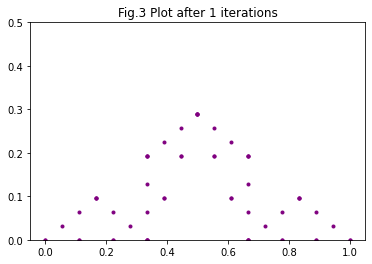

In [ ]:
trig = koch_iter(input_trig=default_trig,iteration=2,section=0)

In [33]:
def cal_diameter(arr):
    temp_arr = arr.reshape(reduce(mul,arr.shape[:-1]),2)
    max_val = 0
    all_sets = permutations(temp_arr,2)
    for i in all_sets:
        _l2 = norm(abs(i[1]-i[0]),2)
        max_val = max(max_val,_l2)
    return max_val

In [41]:
def solve(iterations):
    trig = koch_iter(input_trig=np.array([[0,0],[1/2,sqrt(3)/6],[1,0]]),iteration=iterations,section=0)
    trig = trig.reshape(reduce(mul,trig.shape[:-2]),3,2)
    def eval_diameter(k):
        nonlocal trig
        min_val = 1
        for i in range(trig.shape[0]-k):
            min_val = min(cal_diameter(trig[i:i+k]),min_val)
        return min_val
    for k in tqdm(range(1,4**iterations)):
        print(f'i = {iterations}, k = {k}, diameter of the lower bound cover: {eval_diameter(k)}')

100%|██████████| 3/3 [00:00<00:00, 411.10it/s]

i = 1, k = 1, diameter of the lower bound cover: 0.3333333333333333
i = 1, k = 2, diameter of the lower bound cover: 0.38490017945975047
i = 1, k = 3, diameter of the lower bound cover: 0.6938886664887107


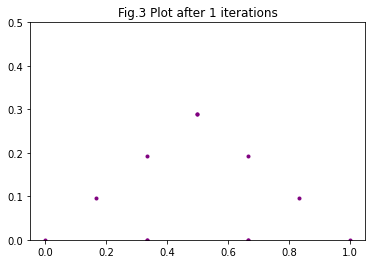

In [42]:
solve(1)

 40%|████      | 6/15 [00:00<00:00, 42.59it/s]

i = 2, k = 1, diameter of the lower bound cover: 0.11111111111111105
i = 2, k = 2, diameter of the lower bound cover: 0.12830005981991677
i = 2, k = 3, diameter of the lower bound cover: 0.22222222222222227
i = 2, k = 4, diameter of the lower bound cover: 0.22222222222222227
i = 2, k = 5, diameter of the lower bound cover: 0.2939723678960657
i = 2, k = 6, diameter of the lower bound cover: 0.3394500514782103
i = 2, k = 7, diameter of the lower bound cover: 0.3849001794597504


 73%|███████▎  | 11/15 [00:00<00:00, 25.13it/s]

i = 2, k = 8, diameter of the lower bound cover: 0.38490017945975047
i = 2, k = 9, diameter of the lower bound cover: 0.4843221048378525
i = 2, k = 10, diameter of the lower bound cover: 0.5091750772173156
i = 2, k = 11, diameter of the lower bound cover: 0.587944735792131


100%|██████████| 15/15 [00:00<00:00, 23.13it/s]

i = 2, k = 12, diameter of the lower bound cover: 0.6666666666666667
i = 2, k = 13, diameter of the lower bound cover: 0.7286042804780001
i = 2, k = 14, diameter of the lower bound cover: 0.7804187965076101
i = 2, k = 15, diameter of the lower bound cover: 0.891200697445627


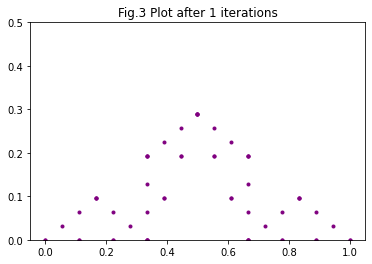

In [43]:
solve(2)

  6%|▋         | 4/63 [00:00<00:03, 15.38it/s]

i = 3, k = 1, diameter of the lower bound cover: 0.03703703703703696
i = 3, k = 2, diameter of the lower bound cover: 0.04276668660663879
i = 3, k = 3, diameter of the lower bound cover: 0.07407407407407396
i = 3, k = 4, diameter of the lower bound cover: 0.07407407407407399


  8%|▊         | 5/63 [00:00<00:06,  9.36it/s]

i = 3, k = 5, diameter of the lower bound cover: 0.09799078929868842


 10%|▉         | 6/63 [00:00<00:08,  6.51it/s]

i = 3, k = 6, diameter of the lower bound cover: 0.11315001715940327


 11%|█         | 7/63 [00:00<00:10,  5.27it/s]

i = 3, k = 7, diameter of the lower bound cover: 0.12830005981991666


 13%|█▎        | 8/63 [00:01<00:10,  5.06it/s]

i = 3, k = 8, diameter of the lower bound cover: 0.12830005981991674


 14%|█▍        | 9/63 [00:01<00:14,  3.82it/s]

i = 3, k = 9, diameter of the lower bound cover: 0.1614407016126173


 16%|█▌        | 10/63 [00:02<00:16,  3.25it/s]

i = 3, k = 10, diameter of the lower bound cover: 0.16972502573910503


 17%|█▋        | 11/63 [00:02<00:17,  2.96it/s]

i = 3, k = 11, diameter of the lower bound cover: 0.19598157859737686


 19%|█▉        | 12/63 [00:03<00:21,  2.39it/s]

i = 3, k = 12, diameter of the lower bound cover: 0.19598157859737714


 21%|██        | 13/63 [00:03<00:23,  2.17it/s]

i = 3, k = 13, diameter of the lower bound cover: 0.20621349491963048


 22%|██▏       | 14/63 [00:04<00:26,  1.85it/s]

i = 3, k = 14, diameter of the lower bound cover: 0.20621349491963048


 24%|██▍       | 15/63 [00:05<00:29,  1.63it/s]

i = 3, k = 15, diameter of the lower bound cover: 0.22222222222222227


 25%|██▌       | 16/63 [00:05<00:30,  1.55it/s]

i = 3, k = 16, diameter of the lower bound cover: 0.22222222222222227


 27%|██▋       | 17/63 [00:06<00:32,  1.39it/s]

i = 3, k = 17, diameter of the lower bound cover: 0.24286809349266666


 29%|██▊       | 18/63 [00:07<00:35,  1.27it/s]

i = 3, k = 18, diameter of the lower bound cover: 0.2566001196398337


 30%|███       | 19/63 [00:08<00:37,  1.17it/s]

i = 3, k = 19, diameter of the lower bound cover: 0.2828750428985087


 32%|███▏      | 20/63 [00:09<00:40,  1.06it/s]

i = 3, k = 20, diameter of the lower bound cover: 0.2939723678960657


 33%|███▎      | 21/63 [00:10<00:42,  1.01s/it]

i = 3, k = 21, diameter of the lower bound cover: 0.32288140322523506


 35%|███▍      | 22/63 [00:12<00:44,  1.09s/it]

i = 3, k = 22, diameter of the lower bound cover: 0.33945005147821017


 37%|███▋      | 23/63 [00:13<00:46,  1.16s/it]

i = 3, k = 23, diameter of the lower bound cover: 0.3394500514782102


 38%|███▊      | 24/63 [00:15<00:48,  1.25s/it]

i = 3, k = 24, diameter of the lower bound cover: 0.3394500514782102


 40%|███▉      | 25/63 [00:16<00:50,  1.33s/it]

i = 3, k = 25, diameter of the lower bound cover: 0.3394500514782102


 41%|████▏     | 26/63 [00:18<00:53,  1.44s/it]

i = 3, k = 26, diameter of the lower bound cover: 0.3394500514782102


 43%|████▎     | 27/63 [00:20<00:55,  1.54s/it]

i = 3, k = 27, diameter of the lower bound cover: 0.35717225040714634


 44%|████▍     | 28/63 [00:21<00:55,  1.58s/it]

i = 3, k = 28, diameter of the lower bound cover: 0.35717225040714634


 46%|████▌     | 29/63 [00:23<00:56,  1.66s/it]

i = 3, k = 29, diameter of the lower bound cover: 0.3653987305419441


 48%|████▊     | 30/63 [00:25<00:56,  1.71s/it]

i = 3, k = 30, diameter of the lower bound cover: 0.3653987305419441


 49%|████▉     | 31/63 [00:27<00:58,  1.82s/it]

i = 3, k = 31, diameter of the lower bound cover: 0.3849001794597504


 51%|█████     | 32/63 [00:29<00:57,  1.87s/it]

i = 3, k = 32, diameter of the lower bound cover: 0.38490017945975047


 52%|█████▏    | 33/63 [00:31<00:58,  1.95s/it]

i = 3, k = 33, diameter of the lower bound cover: 0.41738620998461634


 54%|█████▍    | 34/63 [00:33<00:58,  2.00s/it]

i = 3, k = 34, diameter of the lower bound cover: 0.41738620998461645


 56%|█████▌    | 35/63 [00:35<00:57,  2.06s/it]

i = 3, k = 35, diameter of the lower bound cover: 0.4271319479507702


 57%|█████▋    | 36/63 [00:38<00:57,  2.14s/it]

i = 3, k = 36, diameter of the lower bound cover: 0.4444444444444444


 59%|█████▊    | 37/63 [00:40<00:56,  2.19s/it]

i = 3, k = 37, diameter of the lower bound cover: 0.4640727439311728


 60%|██████    | 38/63 [00:42<00:55,  2.23s/it]

i = 3, k = 38, diameter of the lower bound cover: 0.4819560813813119


 62%|██████▏   | 39/63 [00:45<00:53,  2.25s/it]

i = 3, k = 39, diameter of the lower bound cover: 0.498282372113841


 63%|██████▎   | 40/63 [00:47<00:52,  2.27s/it]

i = 3, k = 40, diameter of the lower bound cover: 0.5091750772173156


 65%|██████▌   | 41/63 [00:49<00:50,  2.29s/it]

i = 3, k = 41, diameter of the lower bound cover: 0.5341557445131835


 67%|██████▋   | 42/63 [00:52<00:48,  2.29s/it]

i = 3, k = 42, diameter of the lower bound cover: 0.5592469952052407


 68%|██████▊   | 43/63 [00:54<00:46,  2.30s/it]

i = 3, k = 43, diameter of the lower bound cover: 0.5753669233447427


 70%|██████▉   | 44/63 [00:56<00:44,  2.33s/it]

i = 3, k = 44, diameter of the lower bound cover: 0.587944735792131


 71%|███████▏  | 45/63 [00:59<00:42,  2.36s/it]

i = 3, k = 45, diameter of the lower bound cover: 0.5960547014604103


 73%|███████▎  | 46/63 [01:01<00:40,  2.36s/it]

i = 3, k = 46, diameter of the lower bound cover: 0.6119522830317891


 75%|███████▍  | 47/63 [01:03<00:37,  2.33s/it]

i = 3, k = 47, diameter of the lower bound cover: 0.6328891663198171


 76%|███████▌  | 48/63 [01:06<00:35,  2.34s/it]

i = 3, k = 48, diameter of the lower bound cover: 0.6666666666666666


 78%|███████▊  | 49/63 [01:08<00:32,  2.30s/it]

i = 3, k = 49, diameter of the lower bound cover: 0.6859355250908198


 79%|███████▉  | 50/63 [01:10<00:29,  2.25s/it]

i = 3, k = 50, diameter of the lower bound cover: 0.6859355250908198


 81%|████████  | 51/63 [01:12<00:26,  2.20s/it]

i = 3, k = 51, diameter of the lower bound cover: 0.706621630679219


 83%|████████▎ | 52/63 [01:14<00:23,  2.17s/it]

i = 3, k = 52, diameter of the lower bound cover: 0.7286042804780001


 84%|████████▍ | 53/63 [01:16<00:20,  2.07s/it]

i = 3, k = 53, diameter of the lower bound cover: 0.7456626602736542


 86%|████████▌ | 54/63 [01:18<00:17,  1.99s/it]

i = 3, k = 54, diameter of the lower bound cover: 0.778071666992036


 87%|████████▋ | 55/63 [01:20<00:15,  1.92s/it]

i = 3, k = 55, diameter of the lower bound cover: 0.7804187965076101


 89%|████████▉ | 56/63 [01:21<00:12,  1.83s/it]

i = 3, k = 56, diameter of the lower bound cover: 0.7804187965076101


 90%|█████████ | 57/63 [01:23<00:10,  1.70s/it]

i = 3, k = 57, diameter of the lower bound cover: 0.8173361663227372


 92%|█████████▏| 58/63 [01:24<00:07,  1.57s/it]

i = 3, k = 58, diameter of the lower bound cover: 0.8339503888294594


 94%|█████████▎| 59/63 [01:25<00:05,  1.45s/it]

i = 3, k = 59, diameter of the lower bound cover: 0.8542638959015402


 95%|█████████▌| 60/63 [01:26<00:03,  1.29s/it]

i = 3, k = 60, diameter of the lower bound cover: 0.8888888888888888


 97%|█████████▋| 61/63 [01:27<00:02,  1.13s/it]

i = 3, k = 61, diameter of the lower bound cover: 0.9079741238615749


 98%|█████████▊| 62/63 [01:27<00:00,  1.07it/s]

i = 3, k = 62, diameter of the lower bound cover: 0.9261728065931383


100%|██████████| 63/63 [01:28<00:00,  1.40s/it]

i = 3, k = 63, diameter of the lower bound cover: 0.9632003506068902


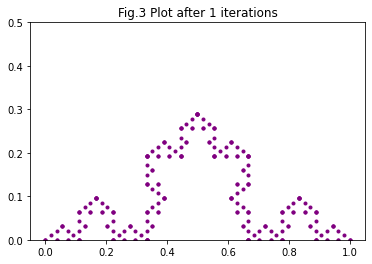

In [44]:
solve(3)

  0%|          | 0/255 [00:00<?, ?it/s]

i = 4, k = 1, diameter of the lower bound cover: 0.012345679012345604
i = 4, k = 2, diameter of the lower bound cover: 0.01425556220221293


  1%|          | 3/255 [00:00<00:24, 10.48it/s]

i = 4, k = 3, diameter of the lower bound cover: 0.02469135802469119


  2%|▏         | 4/255 [00:00<00:38,  6.48it/s]

i = 4, k = 4, diameter of the lower bound cover: 0.02469135802469132


  2%|▏         | 5/255 [00:00<00:58,  4.30it/s]

i = 4, k = 5, diameter of the lower bound cover: 0.0326635964328961


  2%|▏         | 6/255 [00:01<01:26,  2.88it/s]

i = 4, k = 6, diameter of the lower bound cover: 0.037716672386467705


  3%|▎         | 7/255 [00:02<02:01,  2.04it/s]

i = 4, k = 7, diameter of the lower bound cover: 0.0427666866066388


  3%|▎         | 8/255 [00:03<02:40,  1.54it/s]

i = 4, k = 8, diameter of the lower bound cover: 0.04276668660663886


  4%|▎         | 9/255 [00:04<03:23,  1.21it/s]

i = 4, k = 9, diameter of the lower bound cover: 0.053813567204205645


  4%|▍         | 10/255 [00:06<04:19,  1.06s/it]

i = 4, k = 10, diameter of the lower bound cover: 0.05657500857970155


  4%|▍         | 11/255 [00:08<05:10,  1.27s/it]

i = 4, k = 11, diameter of the lower bound cover: 0.0653271928657921


  5%|▍         | 12/255 [00:10<06:11,  1.53s/it]

i = 4, k = 12, diameter of the lower bound cover: 0.06532719286579232


  5%|▌         | 13/255 [00:12<07:19,  1.82s/it]

i = 4, k = 13, diameter of the lower bound cover: 0.06873783163987672


  5%|▌         | 14/255 [00:15<08:30,  2.12s/it]

i = 4, k = 14, diameter of the lower bound cover: 0.06873783163987679


  6%|▌         | 15/255 [00:18<09:48,  2.45s/it]

i = 4, k = 15, diameter of the lower bound cover: 0.07407407407407396


  6%|▋         | 16/255 [00:22<11:26,  2.87s/it]

i = 4, k = 16, diameter of the lower bound cover: 0.07407407407407399


  7%|▋         | 17/255 [00:26<12:52,  3.24s/it]

i = 4, k = 17, diameter of the lower bound cover: 0.08095603116422215


  7%|▋         | 18/255 [00:31<14:28,  3.66s/it]

i = 4, k = 18, diameter of the lower bound cover: 0.08553337321327781


  7%|▋         | 19/255 [00:36<16:11,  4.12s/it]

i = 4, k = 19, diameter of the lower bound cover: 0.0942916809661694


  8%|▊         | 20/255 [00:42<17:57,  4.58s/it]

i = 4, k = 20, diameter of the lower bound cover: 0.09799078929868842


  8%|▊         | 21/255 [00:48<19:39,  5.04s/it]

i = 4, k = 21, diameter of the lower bound cover: 0.10762713440841157


  9%|▊         | 22/255 [00:55<21:42,  5.59s/it]

i = 4, k = 22, diameter of the lower bound cover: 0.11315001715940318


  9%|▉         | 23/255 [01:02<23:34,  6.10s/it]

i = 4, k = 23, diameter of the lower bound cover: 0.11315001715940329


  9%|▉         | 24/255 [01:10<25:33,  6.64s/it]

i = 4, k = 24, diameter of the lower bound cover: 0.1131500171594033


 10%|▉         | 25/255 [01:18<27:36,  7.20s/it]

i = 4, k = 25, diameter of the lower bound cover: 0.1131500171594033


 10%|█         | 26/255 [01:28<29:53,  7.83s/it]

i = 4, k = 26, diameter of the lower bound cover: 0.1131500171594033


 11%|█         | 27/255 [01:38<32:04,  8.44s/it]

i = 4, k = 27, diameter of the lower bound cover: 0.11905741680238198


 11%|█         | 28/255 [01:48<34:21,  9.08s/it]

i = 4, k = 28, diameter of the lower bound cover: 0.11905741680238215


 11%|█▏        | 29/255 [02:00<36:49,  9.78s/it]

i = 4, k = 29, diameter of the lower bound cover: 0.12179957684731457


 12%|█▏        | 30/255 [02:12<39:11, 10.45s/it]

i = 4, k = 30, diameter of the lower bound cover: 0.12179957684731473


 12%|█▏        | 31/255 [02:24<41:43, 11.18s/it]

i = 4, k = 31, diameter of the lower bound cover: 0.12830005981991666


 13%|█▎        | 32/255 [02:38<44:15, 11.91s/it]

i = 4, k = 32, diameter of the lower bound cover: 0.12830005981991674


 13%|█▎        | 33/255 [02:52<46:51, 12.66s/it]

i = 4, k = 33, diameter of the lower bound cover: 0.1391287366615386


 13%|█▎        | 34/255 [03:08<49:34, 13.46s/it]

i = 4, k = 34, diameter of the lower bound cover: 0.13912873666153877


 14%|█▎        | 35/255 [03:24<52:44, 14.38s/it]

i = 4, k = 35, diameter of the lower bound cover: 0.1423773159835899


 14%|█▍        | 36/255 [03:42<55:40, 15.25s/it]

i = 4, k = 36, diameter of the lower bound cover: 0.14814814814814803


 15%|█▍        | 37/255 [03:59<58:18, 16.05s/it]

i = 4, k = 37, diameter of the lower bound cover: 0.1546909146437241


 15%|█▍        | 38/255 [04:18<1:01:06, 16.90s/it]

i = 4, k = 38, diameter of the lower bound cover: 0.16065202712710375


 15%|█▌        | 39/255 [04:38<1:04:02, 17.79s/it]

i = 4, k = 39, diameter of the lower bound cover: 0.16609412403794688


 16%|█▌        | 40/255 [04:59<1:06:28, 18.55s/it]

i = 4, k = 40, diameter of the lower bound cover: 0.16972502573910503


 16%|█▌        | 41/255 [05:20<1:09:14, 19.41s/it]

i = 4, k = 41, diameter of the lower bound cover: 0.1780519148377277


 16%|█▋        | 42/255 [05:42<1:11:59, 20.28s/it]

i = 4, k = 42, diameter of the lower bound cover: 0.18641566506841334


 17%|█▋        | 43/255 [06:06<1:15:14, 21.30s/it]

i = 4, k = 43, diameter of the lower bound cover: 0.19178897444824744


 17%|█▋        | 44/255 [06:30<1:18:08, 22.22s/it]

i = 4, k = 44, diameter of the lower bound cover: 0.19598157859737686


 18%|█▊        | 45/255 [06:56<1:21:03, 23.16s/it]

i = 4, k = 45, diameter of the lower bound cover: 0.1959815785973771


 18%|█▊        | 46/255 [07:22<1:23:52, 24.08s/it]

i = 4, k = 46, diameter of the lower bound cover: 0.1959815785973771


 18%|█▊        | 47/255 [07:49<1:26:46, 25.03s/it]

i = 4, k = 47, diameter of the lower bound cover: 0.1959815785973771


 19%|█▉        | 48/255 [08:18<1:29:52, 26.05s/it]

i = 4, k = 48, diameter of the lower bound cover: 0.19598157859737714


 19%|█▉        | 49/255 [08:48<1:33:34, 27.25s/it]

i = 4, k = 49, diameter of the lower bound cover: 0.19598157859737714


 20%|█▉        | 50/255 [09:18<1:36:26, 28.23s/it]

i = 4, k = 50, diameter of the lower bound cover: 0.19598157859737714


 20%|██        | 51/255 [09:50<1:39:13, 29.18s/it]

i = 4, k = 51, diameter of the lower bound cover: 0.19598157859737714


 20%|██        | 52/255 [10:22<1:42:09, 30.20s/it]

i = 4, k = 52, diameter of the lower bound cover: 0.19598157859737714


 21%|██        | 53/255 [10:56<1:45:20, 31.29s/it]

i = 4, k = 53, diameter of the lower bound cover: 0.19598157859737714


 21%|██        | 54/255 [11:31<1:49:04, 32.56s/it]

i = 4, k = 54, diameter of the lower bound cover: 0.19598157859737714


 22%|██▏       | 55/255 [12:08<1:52:26, 33.73s/it]

i = 4, k = 55, diameter of the lower bound cover: 0.20621349491963048


 22%|██▏       | 56/255 [13:59<3:08:20, 56.79s/it]

i = 4, k = 56, diameter of the lower bound cover: 0.20621349491963048


 22%|██▏       | 57/255 [15:52<4:03:19, 73.73s/it]

i = 4, k = 57, diameter of the lower bound cover: 0.21096305543993907


 23%|██▎       | 58/255 [16:31<3:28:19, 63.45s/it]

i = 4, k = 58, diameter of the lower bound cover: 0.21096305543993907


 23%|██▎       | 59/255 [17:12<3:04:54, 56.61s/it]

i = 4, k = 59, diameter of the lower bound cover: 0.2109630554399391


 24%|██▎       | 60/255 [17:54<2:49:36, 52.19s/it]

i = 4, k = 60, diameter of the lower bound cover: 0.2109630554399391


 24%|██▍       | 61/255 [18:37<2:40:02, 49.50s/it]

i = 4, k = 61, diameter of the lower bound cover: 0.21631377120907697


 24%|██▍       | 62/255 [19:22<2:34:43, 48.10s/it]

i = 4, k = 62, diameter of the lower bound cover: 0.21631377120907697


 25%|██▍       | 63/255 [20:07<2:31:05, 47.22s/it]

i = 4, k = 63, diameter of the lower bound cover: 0.22222222222222227


 25%|██▌       | 64/255 [20:54<2:29:40, 47.02s/it]

i = 4, k = 64, diameter of the lower bound cover: 0.22222222222222227


 25%|██▌       | 65/255 [21:42<2:29:59, 47.37s/it]

i = 4, k = 65, diameter of the lower bound cover: 0.22864517503027323


 26%|██▌       | 66/255 [22:31<2:31:01, 47.94s/it]

i = 4, k = 66, diameter of the lower bound cover: 0.2286451750302733


 26%|██▋       | 67/255 [23:21<2:32:24, 48.64s/it]

i = 4, k = 67, diameter of the lower bound cover: 0.24097804069065595


 27%|██▋       | 68/255 [24:13<2:34:09, 49.46s/it]

i = 4, k = 68, diameter of the lower bound cover: 0.24097804069065604


 27%|██▋       | 69/255 [25:05<2:36:21, 50.44s/it]

i = 4, k = 69, diameter of the lower bound cover: 0.24139933129320928


 27%|██▋       | 70/255 [26:00<2:38:58, 51.56s/it]

i = 4, k = 70, diameter of the lower bound cover: 0.2423445574376207


 28%|██▊       | 71/255 [26:55<2:41:56, 52.81s/it]

i = 4, k = 71, diameter of the lower bound cover: 0.2497776280739674


 28%|██▊       | 72/255 [27:52<2:44:29, 53.93s/it]

i = 4, k = 72, diameter of the lower bound cover: 0.2566001196398337


 29%|██▊       | 73/255 [28:49<2:46:47, 54.99s/it]

i = 4, k = 73, diameter of the lower bound cover: 0.26023723051460707


 29%|██▉       | 74/255 [29:48<2:49:22, 56.15s/it]

i = 4, k = 74, diameter of the lower bound cover: 0.2679325236322309


 29%|██▉       | 75/255 [30:48<2:51:54, 57.30s/it]

i = 4, k = 75, diameter of the lower bound cover: 0.2782574733230775


 30%|██▉       | 76/255 [31:50<2:55:05, 58.69s/it]

i = 4, k = 76, diameter of the lower bound cover: 0.27825747332307754


 30%|███       | 77/255 [32:53<2:58:18, 60.11s/it]

i = 4, k = 77, diameter of the lower bound cover: 0.28287504289850857


 31%|███       | 78/255 [33:58<3:01:05, 61.39s/it]

i = 4, k = 78, diameter of the lower bound cover: 0.28287504289850857


 31%|███       | 79/255 [35:03<3:03:31, 62.56s/it]

i = 4, k = 79, diameter of the lower bound cover: 0.2896195606570026


 31%|███▏      | 80/255 [36:10<3:05:55, 63.75s/it]

i = 4, k = 80, diameter of the lower bound cover: 0.2939723678960657


 32%|███▏      | 81/255 [37:18<3:08:43, 65.08s/it]

i = 4, k = 81, diameter of the lower bound cover: 0.3003833348295417


 32%|███▏      | 82/255 [38:27<3:11:25, 66.39s/it]

i = 4, k = 82, diameter of the lower bound cover: 0.3083949628838715


 33%|███▎      | 83/255 [39:38<3:13:57, 67.66s/it]

i = 4, k = 83, diameter of the lower bound cover: 0.3130548724223695


 33%|███▎      | 84/255 [40:50<3:16:57, 69.11s/it]

i = 4, k = 84, diameter of the lower bound cover: 0.32288140322523484


 33%|███▎      | 85/255 [42:04<3:19:32, 70.43s/it]

i = 4, k = 85, diameter of the lower bound cover: 0.3271799046963121


 34%|███▎      | 86/255 [43:19<3:22:02, 71.73s/it]

i = 4, k = 86, diameter of the lower bound cover: 0.3321882480758941


 34%|███▍      | 87/255 [44:35<3:24:55, 73.19s/it]

i = 4, k = 87, diameter of the lower bound cover: 0.33287577191883366


 35%|███▍      | 88/255 [45:58<3:31:30, 75.99s/it]

i = 4, k = 88, diameter of the lower bound cover: 0.3356117831868688


 35%|███▍      | 89/255 [47:17<3:32:33, 76.83s/it]

i = 4, k = 89, diameter of the lower bound cover: 0.33945005147821017


 35%|███▌      | 90/255 [48:36<3:33:10, 77.52s/it]

i = 4, k = 90, diameter of the lower bound cover: 0.33945005147821017


 36%|███▌      | 91/255 [49:57<3:35:00, 78.66s/it]

i = 4, k = 91, diameter of the lower bound cover: 0.33945005147821017


 36%|███▌      | 92/255 [51:20<3:37:28, 80.05s/it]

i = 4, k = 92, diameter of the lower bound cover: 0.33945005147821017


 36%|███▋      | 93/255 [52:45<3:39:54, 81.44s/it]

i = 4, k = 93, diameter of the lower bound cover: 0.33945005147821017


 37%|███▋      | 94/255 [54:11<3:41:47, 82.66s/it]

i = 4, k = 94, diameter of the lower bound cover: 0.3394500514782102


 37%|███▋      | 95/255 [55:38<3:43:57, 83.98s/it]

i = 4, k = 95, diameter of the lower bound cover: 0.3394500514782102


 38%|███▊      | 96/255 [57:10<3:49:09, 86.48s/it]

i = 4, k = 96, diameter of the lower bound cover: 0.3394500514782102


 38%|███▊      | 97/255 [58:39<3:49:35, 87.19s/it]

i = 4, k = 97, diameter of the lower bound cover: 0.3394500514782102


 38%|███▊      | 98/255 [1:00:10<3:50:57, 88.27s/it]

i = 4, k = 98, diameter of the lower bound cover: 0.3394500514782102


 39%|███▉      | 99/255 [1:01:43<3:53:22, 89.76s/it]

i = 4, k = 99, diameter of the lower bound cover: 0.3394500514782102


 39%|███▉      | 100/255 [1:03:16<3:54:45, 90.88s/it]

i = 4, k = 100, diameter of the lower bound cover: 0.3394500514782102


 40%|███▉      | 101/255 [1:04:50<3:55:24, 91.71s/it]

i = 4, k = 101, diameter of the lower bound cover: 0.3394500514782102


 40%|████      | 102/255 [1:06:29<3:59:45, 94.02s/it]

i = 4, k = 102, diameter of the lower bound cover: 0.3394500514782102


 40%|████      | 103/255 [1:08:07<4:00:50, 95.07s/it]

i = 4, k = 103, diameter of the lower bound cover: 0.3394500514782102


 41%|████      | 104/255 [1:09:45<4:01:22, 95.91s/it]

i = 4, k = 104, diameter of the lower bound cover: 0.3394500514782102


 41%|████      | 105/255 [1:11:24<4:02:30, 97.01s/it]

i = 4, k = 105, diameter of the lower bound cover: 0.3394500514782102


 42%|████▏     | 106/255 [1:13:06<4:04:02, 98.27s/it]

i = 4, k = 106, diameter of the lower bound cover: 0.3394500514782102


 42%|████▏     | 107/255 [1:14:46<4:03:43, 98.81s/it]

i = 4, k = 107, diameter of the lower bound cover: 0.3394500514782102


 42%|████▏     | 108/255 [1:16:28<4:04:29, 99.80s/it]

i = 4, k = 108, diameter of the lower bound cover: 0.3394500514782102


 43%|████▎     | 109/255 [1:18:13<4:06:44, 101.40s/it]

i = 4, k = 109, diameter of the lower bound cover: 0.34567901234567877


 43%|████▎     | 110/255 [1:19:58<4:08:01, 102.63s/it]

i = 4, k = 110, diameter of the lower bound cover: 0.3456790123456788


 44%|████▎     | 111/255 [1:21:45<4:09:34, 103.99s/it]

i = 4, k = 111, diameter of the lower bound cover: 0.35717225040714634


 44%|████▍     | 112/255 [1:23:35<4:11:27, 105.50s/it]

i = 4, k = 112, diameter of the lower bound cover: 0.35717225040714634


 44%|████▍     | 113/255 [1:25:23<4:11:28, 106.25s/it]

i = 4, k = 113, diameter of the lower bound cover: 0.3597941233645166


 45%|████▍     | 114/255 [1:27:13<4:12:24, 107.41s/it]

i = 4, k = 114, diameter of the lower bound cover: 0.3597941233645166


 45%|████▌     | 115/255 [1:29:06<4:15:03, 109.31s/it]

i = 4, k = 115, diameter of the lower bound cover: 0.3653987305419441


 45%|████▌     | 116/255 [1:30:59<4:15:14, 110.18s/it]

i = 4, k = 116, diameter of the lower bound cover: 0.3653987305419441


 46%|████▌     | 117/255 [1:32:51<4:15:10, 110.94s/it]

i = 4, k = 117, diameter of the lower bound cover: 0.3653987305419441


 46%|████▋     | 118/255 [1:34:46<4:15:35, 111.94s/it]

i = 4, k = 118, diameter of the lower bound cover: 0.3653987305419441


 47%|████▋     | 119/255 [1:36:40<4:15:20, 112.65s/it]

i = 4, k = 119, diameter of the lower bound cover: 0.3653987305419441


 47%|████▋     | 120/255 [1:38:37<4:16:12, 113.87s/it]

i = 4, k = 120, diameter of the lower bound cover: 0.3653987305419441


 47%|████▋     | 121/255 [1:40:35<4:17:12, 115.17s/it]

i = 4, k = 121, diameter of the lower bound cover: 0.3653987305419441


 48%|████▊     | 122/255 [1:42:34<4:17:47, 116.30s/it]

i = 4, k = 122, diameter of the lower bound cover: 0.3653987305419441


 48%|████▊     | 123/255 [1:44:33<4:18:02, 117.29s/it]

i = 4, k = 123, diameter of the lower bound cover: 0.3746664421109509


 49%|████▊     | 124/255 [1:46:33<4:17:55, 118.13s/it]

i = 4, k = 124, diameter of the lower bound cover: 0.3746664421109511


 49%|████▉     | 125/255 [1:48:34<4:17:51, 119.01s/it]

i = 4, k = 125, diameter of the lower bound cover: 0.3779740741795895


 49%|████▉     | 126/255 [1:50:38<4:18:50, 120.39s/it]

i = 4, k = 126, diameter of the lower bound cover: 0.3779740741795896


 50%|████▉     | 127/255 [1:52:43<4:19:32, 121.66s/it]

i = 4, k = 127, diameter of the lower bound cover: 0.3849001794597504


 50%|█████     | 128/255 [1:54:49<4:20:15, 122.96s/it]

i = 4, k = 128, diameter of the lower bound cover: 0.38490017945975047


 51%|█████     | 129/255 [1:56:54<4:19:47, 123.71s/it]

i = 4, k = 129, diameter of the lower bound cover: 0.3956400088632608


 51%|█████     | 130/255 [1:59:01<4:19:38, 124.63s/it]

i = 4, k = 130, diameter of the lower bound cover: 0.3956400088632609


 51%|█████▏    | 131/255 [2:01:10<4:20:10, 125.89s/it]

i = 4, k = 131, diameter of the lower bound cover: 0.396025060057912


 52%|█████▏    | 132/255 [2:03:19<4:20:16, 126.96s/it]

i = 4, k = 132, diameter of the lower bound cover: 0.39602506005791216


 52%|█████▏    | 133/255 [2:05:31<4:20:51, 128.29s/it]

i = 4, k = 133, diameter of the lower bound cover: 0.4064710526704771


 53%|█████▎    | 134/255 [2:07:40<4:19:35, 128.73s/it]

i = 4, k = 134, diameter of the lower bound cover: 0.4064710526704772


 53%|█████▎    | 135/255 [2:09:51<4:18:32, 129.27s/it]

i = 4, k = 135, diameter of the lower bound cover: 0.41738620998461634


 53%|█████▎    | 136/255 [2:12:03<4:18:08, 130.16s/it]

i = 4, k = 136, diameter of the lower bound cover: 0.41738620998461645


 54%|█████▎    | 137/255 [2:14:17<4:17:58, 131.17s/it]

i = 4, k = 137, diameter of the lower bound cover: 0.41811590671299


 54%|█████▍    | 138/255 [2:16:31<4:17:33, 132.08s/it]

i = 4, k = 138, diameter of the lower bound cover: 0.41811590671299


 55%|█████▍    | 139/255 [2:18:46<4:16:55, 132.89s/it]

i = 4, k = 139, diameter of the lower bound cover: 0.4197530864197531


 55%|█████▍    | 140/255 [2:21:00<4:15:17, 133.20s/it]

i = 4, k = 140, diameter of the lower bound cover: 0.4197530864197532


 55%|█████▌    | 141/255 [2:23:14<4:13:47, 133.57s/it]

i = 4, k = 141, diameter of the lower bound cover: 0.426060096956479


 56%|█████▌    | 142/255 [2:25:31<4:13:16, 134.48s/it]

i = 4, k = 142, diameter of the lower bound cover: 0.43209876543209885


 56%|█████▌    | 143/255 [2:27:49<4:12:56, 135.50s/it]

i = 4, k = 143, diameter of the lower bound cover: 0.43840199764357296


 56%|█████▋    | 144/255 [2:30:07<4:12:08, 136.29s/it]

i = 4, k = 144, diameter of the lower bound cover: 0.4444444444444444


 57%|█████▋    | 145/255 [2:32:26<4:11:45, 137.33s/it]

i = 4, k = 145, diameter of the lower bound cover: 0.4507441052723132


 57%|█████▋    | 146/255 [2:34:44<4:09:41, 137.45s/it]

i = 4, k = 146, diameter of the lower bound cover: 0.4507441052723132


 58%|█████▊    | 147/255 [2:37:03<4:08:13, 137.90s/it]

i = 4, k = 147, diameter of the lower bound cover: 0.45729035006054647


 58%|█████▊    | 148/255 [2:39:23<4:07:14, 138.64s/it]

i = 4, k = 148, diameter of the lower bound cover: 0.4640727439311728


 58%|█████▊    | 149/255 [2:41:45<4:06:27, 139.51s/it]

i = 4, k = 149, diameter of the lower bound cover: 0.4700013674162711


 59%|█████▉    | 150/255 [2:44:11<4:07:24, 141.37s/it]

i = 4, k = 150, diameter of the lower bound cover: 0.48153423790321237


 59%|█████▉    | 151/255 [2:46:32<4:05:10, 141.45s/it]

i = 4, k = 151, diameter of the lower bound cover: 0.48195608138131185


 60%|█████▉    | 152/255 [2:48:54<4:03:02, 141.58s/it]

i = 4, k = 152, diameter of the lower bound cover: 0.4819560813813119


 60%|██████    | 153/255 [2:51:18<4:01:43, 142.19s/it]

i = 4, k = 153, diameter of the lower bound cover: 0.4899539464934426


 60%|██████    | 154/255 [2:53:42<4:00:25, 142.83s/it]

i = 4, k = 154, diameter of the lower bound cover: 0.4899539464934426


 61%|██████    | 155/255 [2:56:11<4:01:18, 144.78s/it]

i = 4, k = 155, diameter of the lower bound cover: 0.4899539464934426


 61%|██████    | 156/255 [2:58:37<3:59:20, 145.05s/it]

i = 4, k = 156, diameter of the lower bound cover: 0.4899539464934426


 62%|██████▏   | 157/255 [3:01:00<3:55:49, 144.39s/it]

i = 4, k = 157, diameter of the lower bound cover: 0.49140351754989237


 62%|██████▏   | 158/255 [3:03:24<3:53:21, 144.35s/it]

i = 4, k = 158, diameter of the lower bound cover: 0.49894467707745427


 62%|██████▏   | 159/255 [3:05:54<3:53:26, 145.90s/it]

i = 4, k = 159, diameter of the lower bound cover: 0.5052686896217561


 63%|██████▎   | 160/255 [3:08:21<3:51:27, 146.19s/it]

i = 4, k = 160, diameter of the lower bound cover: 0.5091750772173156


 63%|██████▎   | 161/255 [3:10:48<3:49:43, 146.63s/it]

i = 4, k = 161, diameter of the lower bound cover: 0.5151270628401251


 64%|██████▎   | 162/255 [3:13:15<3:47:30, 146.78s/it]

i = 4, k = 162, diameter of the lower bound cover: 0.5202791976717401


 64%|██████▍   | 163/255 [3:15:46<3:46:57, 148.02s/it]

i = 4, k = 163, diameter of the lower bound cover: 0.5261538562097685


 64%|██████▍   | 164/255 [3:18:13<3:43:59, 147.69s/it]

i = 4, k = 164, diameter of the lower bound cover: 0.5332037641726918


 65%|██████▍   | 165/255 [3:20:42<3:41:48, 147.87s/it]

i = 4, k = 165, diameter of the lower bound cover: 0.5377106602563597


 65%|██████▌   | 166/255 [3:23:09<3:39:07, 147.72s/it]

i = 4, k = 166, diameter of the lower bound cover: 0.542226944592537


 65%|██████▌   | 167/255 [3:25:36<3:36:32, 147.64s/it]

i = 4, k = 167, diameter of the lower bound cover: 0.5478663124491397


 66%|██████▌   | 168/255 [3:28:03<3:33:27, 147.22s/it]

i = 4, k = 168, diameter of the lower bound cover: 0.5592469952052405


 66%|██████▋   | 169/255 [3:30:29<3:30:42, 147.01s/it]

i = 4, k = 169, diameter of the lower bound cover: 0.5649862565594869


 67%|██████▋   | 170/255 [3:32:57<3:28:40, 147.30s/it]

i = 4, k = 170, diameter of the lower bound cover: 0.5666922181495556


 67%|██████▋   | 171/255 [3:35:27<3:27:07, 147.94s/it]

i = 4, k = 171, diameter of the lower bound cover: 0.5715129382272942


 67%|██████▋   | 172/255 [3:37:54<3:24:37, 147.92s/it]

i = 4, k = 172, diameter of the lower bound cover: 0.5753669233447426


 68%|██████▊   | 173/255 [3:40:20<3:21:23, 147.36s/it]

i = 4, k = 173, diameter of the lower bound cover: 0.5753669233447426


 68%|██████▊   | 174/255 [3:42:48<3:19:00, 147.42s/it]

i = 4, k = 174, diameter of the lower bound cover: 0.5753669233447426


 69%|██████▊   | 175/255 [3:45:15<3:16:20, 147.26s/it]

i = 4, k = 175, diameter of the lower bound cover: 0.5765577495721291


 69%|██████▉   | 176/255 [3:47:43<3:14:15, 147.54s/it]

i = 4, k = 176, diameter of the lower bound cover: 0.5812966600984468


 69%|██████▉   | 177/255 [3:50:11<3:12:00, 147.69s/it]

i = 4, k = 177, diameter of the lower bound cover: 0.5834340279324206


 70%|██████▉   | 178/255 [3:52:39<3:09:30, 147.67s/it]

i = 4, k = 178, diameter of the lower bound cover: 0.5837822428413277


 70%|███████   | 179/255 [3:55:04<3:06:08, 146.95s/it]

i = 4, k = 179, diameter of the lower bound cover: 0.587944735792131


 71%|███████   | 180/255 [3:57:30<3:03:23, 146.71s/it]

i = 4, k = 180, diameter of the lower bound cover: 0.5941337982970847


 71%|███████   | 181/255 [3:59:56<3:00:37, 146.45s/it]

i = 4, k = 181, diameter of the lower bound cover: 0.60004741637227


 71%|███████▏  | 182/255 [4:02:22<2:58:06, 146.40s/it]

i = 4, k = 182, diameter of the lower bound cover: 0.6011471024167826


 72%|███████▏  | 183/255 [4:04:48<2:55:26, 146.20s/it]

i = 4, k = 183, diameter of the lower bound cover: 0.60644810325013


 72%|███████▏  | 184/255 [4:07:14<2:52:44, 145.98s/it]

i = 4, k = 184, diameter of the lower bound cover: 0.6119522830317891


 73%|███████▎  | 185/255 [4:09:38<2:49:36, 145.38s/it]

i = 4, k = 185, diameter of the lower bound cover: 0.618763658574897


 73%|███████▎  | 186/255 [4:12:03<2:47:08, 145.33s/it]

i = 4, k = 186, diameter of the lower bound cover: 0.629992633193732


 73%|███████▎  | 187/255 [4:14:28<2:44:43, 145.34s/it]

i = 4, k = 187, diameter of the lower bound cover: 0.6316034582041041


 74%|███████▎  | 188/255 [4:16:52<2:41:40, 144.79s/it]

i = 4, k = 188, diameter of the lower bound cover: 0.6328891663198171


 74%|███████▍  | 189/255 [4:19:14<2:38:37, 144.20s/it]

i = 4, k = 189, diameter of the lower bound cover: 0.6423313352754847


 75%|███████▍  | 190/255 [4:21:34<2:34:50, 142.92s/it]

i = 4, k = 190, diameter of the lower bound cover: 0.6482363255716087


 75%|███████▍  | 191/255 [4:23:55<2:31:43, 142.24s/it]

i = 4, k = 191, diameter of the lower bound cover: 0.6546703004228568


 75%|███████▌  | 192/255 [4:26:15<2:28:44, 141.66s/it]

i = 4, k = 192, diameter of the lower bound cover: 0.6666666666666666


 76%|███████▌  | 193/255 [4:28:37<2:26:27, 141.73s/it]

i = 4, k = 193, diameter of the lower bound cover: 0.6729244481437847


 76%|███████▌  | 194/255 [4:30:56<2:23:17, 140.95s/it]

i = 4, k = 194, diameter of the lower bound cover: 0.6729244481437848


 76%|███████▋  | 195/255 [4:33:15<2:20:17, 140.29s/it]

i = 4, k = 195, diameter of the lower bound cover: 0.6793489625776594


 77%|███████▋  | 196/255 [4:35:31<2:16:38, 138.96s/it]

i = 4, k = 196, diameter of the lower bound cover: 0.6859355250908198


 77%|███████▋  | 197/255 [4:37:46<2:13:16, 137.88s/it]

i = 4, k = 197, diameter of the lower bound cover: 0.6859355250908198


 78%|███████▊  | 198/255 [4:40:02<2:10:29, 137.36s/it]

i = 4, k = 198, diameter of the lower bound cover: 0.6859355250908198


 78%|███████▊  | 199/255 [4:42:17<2:07:27, 136.57s/it]

i = 4, k = 199, diameter of the lower bound cover: 0.6859355250908198


 78%|███████▊  | 200/255 [4:44:31<2:04:29, 135.80s/it]

i = 4, k = 200, diameter of the lower bound cover: 0.6859355250908198


 79%|███████▉  | 201/255 [4:46:42<2:00:52, 134.30s/it]

i = 4, k = 201, diameter of the lower bound cover: 0.6859355250908198


 79%|███████▉  | 202/255 [4:48:57<1:58:49, 134.52s/it]

i = 4, k = 202, diameter of the lower bound cover: 0.689260486528783


 80%|███████▉  | 203/255 [4:51:07<1:55:17, 133.03s/it]

i = 4, k = 203, diameter of the lower bound cover: 0.6950226216805216


 80%|████████  | 204/255 [4:53:15<1:51:51, 131.59s/it]

i = 4, k = 204, diameter of the lower bound cover: 0.706621630679219


 80%|████████  | 205/255 [4:55:22<1:48:38, 130.37s/it]

i = 4, k = 205, diameter of the lower bound cover: 0.7124572877598214


 81%|████████  | 206/255 [4:57:28<1:45:23, 129.04s/it]

i = 4, k = 206, diameter of the lower bound cover: 0.7138108901468526


 81%|████████  | 207/255 [4:59:37<1:43:04, 128.85s/it]

i = 4, k = 207, diameter of the lower bound cover: 0.7211398452597646


 82%|████████▏ | 208/255 [5:01:39<1:39:25, 126.93s/it]

i = 4, k = 208, diameter of the lower bound cover: 0.7286042804780001


 82%|████████▏ | 209/255 [5:03:41<1:36:07, 125.38s/it]

i = 4, k = 209, diameter of the lower bound cover: 0.734265248714105


 82%|████████▏ | 210/255 [5:05:42<1:32:59, 124.00s/it]

i = 4, k = 210, diameter of the lower bound cover: 0.7419742815465046


 83%|████████▎ | 211/255 [5:07:41<1:29:57, 122.67s/it]

i = 4, k = 211, diameter of the lower bound cover: 0.744162194239717


 83%|████████▎ | 212/255 [5:09:44<1:27:51, 122.60s/it]

i = 4, k = 212, diameter of the lower bound cover: 0.7456626602736542


 84%|████████▎ | 213/255 [5:11:39<1:24:18, 120.45s/it]

i = 4, k = 213, diameter of the lower bound cover: 0.7558137217290846


 84%|████████▍ | 214/255 [5:13:33<1:21:00, 118.55s/it]

i = 4, k = 214, diameter of the lower bound cover: 0.7629389903940924


 84%|████████▍ | 215/255 [5:15:27<1:17:59, 117.00s/it]

i = 4, k = 215, diameter of the lower bound cover: 0.7687436660961722


 85%|████████▍ | 216/255 [5:17:18<1:14:54, 115.23s/it]

i = 4, k = 216, diameter of the lower bound cover: 0.778071666992036


 85%|████████▌ | 217/255 [5:19:11<1:12:37, 114.67s/it]

i = 4, k = 217, diameter of the lower bound cover: 0.778071666992036


 85%|████████▌ | 218/255 [5:20:58<1:09:20, 112.43s/it]

i = 4, k = 218, diameter of the lower bound cover: 0.778071666992036


 86%|████████▌ | 219/255 [5:22:43<1:06:05, 110.16s/it]

i = 4, k = 219, diameter of the lower bound cover: 0.7789526693504866


 86%|████████▋ | 220/255 [5:24:27<1:03:10, 108.29s/it]

i = 4, k = 220, diameter of the lower bound cover: 0.7789526693504869


 87%|████████▋ | 221/255 [5:26:09<1:00:20, 106.49s/it]

i = 4, k = 221, diameter of the lower bound cover: 0.7793765004879075


 87%|████████▋ | 222/255 [5:27:49<57:25, 104.40s/it]  

i = 4, k = 222, diameter of the lower bound cover: 0.7793765004879079


 87%|████████▋ | 223/255 [5:29:26<54:29, 102.19s/it]

i = 4, k = 223, diameter of the lower bound cover: 0.7804187965076101


 88%|████████▊ | 224/255 [5:31:01<51:42, 100.09s/it]

i = 4, k = 224, diameter of the lower bound cover: 0.7804187965076101


 88%|████████▊ | 225/255 [5:32:33<48:52, 97.74s/it] 

i = 4, k = 225, diameter of the lower bound cover: 0.7927233460088219


 89%|████████▊ | 226/255 [5:34:04<46:17, 95.76s/it]

i = 4, k = 226, diameter of the lower bound cover: 0.7980887090811843


 89%|████████▉ | 227/255 [5:35:34<43:49, 93.91s/it]

i = 4, k = 227, diameter of the lower bound cover: 0.8050291549086963


 89%|████████▉ | 228/255 [5:37:00<41:15, 91.67s/it]

i = 4, k = 228, diameter of the lower bound cover: 0.8148148148148149


 90%|████████▉ | 229/255 [5:38:24<38:41, 89.30s/it]

i = 4, k = 229, diameter of the lower bound cover: 0.8210572698601386


 90%|█████████ | 230/255 [5:39:46<36:15, 87.01s/it]

i = 4, k = 230, diameter of the lower bound cover: 0.8227262756319078


 91%|█████████ | 231/255 [5:41:06<33:56, 84.87s/it]

i = 4, k = 231, diameter of the lower bound cover: 0.8282653391466422


 91%|█████████ | 232/255 [5:42:23<31:39, 82.58s/it]

i = 4, k = 232, diameter of the lower bound cover: 0.8339503888294594


 91%|█████████▏| 233/255 [5:43:38<29:25, 80.26s/it]

i = 4, k = 233, diameter of the lower bound cover: 0.8405947916320592


 92%|█████████▏| 234/255 [5:44:50<27:13, 77.76s/it]

i = 4, k = 234, diameter of the lower bound cover: 0.8521201939129579


 92%|█████████▏| 235/255 [5:45:59<25:02, 75.11s/it]

i = 4, k = 235, diameter of the lower bound cover: 0.8533118043313759


 93%|█████████▎| 236/255 [5:47:05<22:57, 72.48s/it]

i = 4, k = 236, diameter of the lower bound cover: 0.8542638959015402


 93%|█████████▎| 237/255 [5:48:09<20:57, 69.84s/it]

i = 4, k = 237, diameter of the lower bound cover: 0.8644620406487513


 93%|█████████▎| 238/255 [5:49:09<19:00, 67.08s/it]

i = 4, k = 238, diameter of the lower bound cover: 0.8704360363986333


 94%|█████████▎| 239/255 [5:50:08<17:10, 64.40s/it]

i = 4, k = 239, diameter of the lower bound cover: 0.8768039952871458


 94%|█████████▍| 240/255 [5:51:02<15:21, 61.40s/it]

i = 4, k = 240, diameter of the lower bound cover: 0.8888888888888888


 95%|█████████▍| 241/255 [5:51:54<13:41, 58.68s/it]

i = 4, k = 241, diameter of the lower bound cover: 0.8951255830777389


 95%|█████████▍| 242/255 [5:52:43<12:04, 55.71s/it]

i = 4, k = 242, diameter of the lower bound cover: 0.8951255830777389


 95%|█████████▌| 243/255 [5:53:29<10:32, 52.69s/it]

i = 4, k = 243, diameter of the lower bound cover: 0.9014882105446264


 96%|█████████▌| 244/255 [5:54:11<09:06, 49.69s/it]

i = 4, k = 244, diameter of the lower bound cover: 0.9079741238615749


 96%|█████████▌| 245/255 [5:54:51<07:46, 46.66s/it]

i = 4, k = 245, diameter of the lower bound cover: 0.9140250279754284


 96%|█████████▋| 246/255 [5:55:27<06:30, 43.42s/it]

i = 4, k = 246, diameter of the lower bound cover: 0.9259533603617456


 97%|█████████▋| 247/255 [5:56:00<05:21, 40.21s/it]

i = 4, k = 247, diameter of the lower bound cover: 0.9261728065931383


 97%|█████████▋| 248/255 [5:56:29<04:19, 37.03s/it]

i = 4, k = 248, diameter of the lower bound cover: 0.9261728065931385


 98%|█████████▊| 249/255 [5:56:55<03:22, 33.72s/it]

i = 4, k = 249, diameter of the lower bound cover: 0.9385152380245446


 98%|█████████▊| 250/255 [5:57:17<02:31, 30.28s/it]

i = 4, k = 250, diameter of the lower bound cover: 0.9445049605400081


 98%|█████████▊| 251/255 [5:57:36<01:47, 26.80s/it]

i = 4, k = 251, diameter of the lower bound cover: 0.9508577537762818


 99%|█████████▉| 252/255 [5:57:51<01:09, 23.31s/it]

i = 4, k = 252, diameter of the lower bound cover: 0.962962962962963


 99%|█████████▉| 253/255 [5:58:03<00:39, 19.83s/it]

i = 4, k = 253, diameter of the lower bound cover: 0.9691947768483912


100%|█████████▉| 254/255 [5:58:11<00:16, 16.22s/it]

i = 4, k = 254, diameter of the lower bound cover: 0.9753346873638534


100%|██████████| 255/255 [5:58:15<00:00, 84.30s/it]

i = 4, k = 255, diameter of the lower bound cover: 0.987680040817374


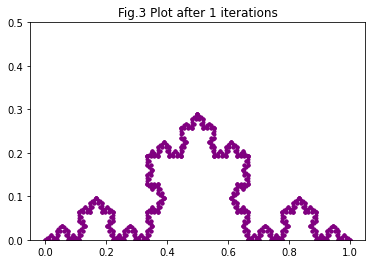

In [45]:
solve(4)